# les deffirentes étapes :

## 1. Exploratory Data Analysis :

### Objectif : analyse de données du dataset dans le but de détreminer les déffirentes relations entre nos variables notamment les features et la variable target  (prices)

- démensions
- types de variables
- valeurs manquantes
- exploration des variables : en exploitant les différentes uniques valeurs pour chaque variables, il semble qu'il y a des valeurs males écrites lors de la collection des données donc il faut mettre à jour notre dataset
- mise à jour du dataset
- éxtraction des données depuis celles de base  
- visualization des variables en utilisant matplotlib et seaborn :
  - le premier graphique(target en fonction du temps/destination) nous indique que pour les destinations (paris, dubai) les prix augmentent considérablement entre le mois de mai et le mois d'aout, pareils pour istanbul qui connais 2 augmentations légères entre fevrier et mars, mai et aout, le prix de billet vers madrid est chers au début d'année/au reste d'année, par contre les prix vers rome varient peut
  - le deuxieme graphique (target en fonction du temps/compagnies) nous indique que la majorité des compagnies font augmentés leurs tarifs entre le mois de mai et le mois de septembre a l'exception de transavia France
  - le troisième montre les variations des tarifs de chaque compagnie, emirates a une median superieure a celle des autres, et le reste semble avoir une median plus ou moins sémilaire.
  
## 2.Pre-processing : 

### Objectif : préparer les données et les mettre dans une format compatible au machine learning 

- encodage des variables catégoriales(destinations, compagnies) (sur une copie du dataset originale afin de crée un model basique)
- création d'un model basique 
- feature engineering 
- création de la variable retour (date de retour) à partir de date de départ
- l'ajout de deux variables a savoir la durée et l'intervalle de voyage en créant un bloc de code et en se basant sur la source des données originales
- création des colonnes jour de départ et mois de départ jour de retour et mois de retour
- fonction pour lacréation  des colonnes ('durée_heures'+'durée_min')=durée du vol,'heure de départ', 'minute de départ' ainsi que l'heure d'arivée et la minute d'arivée.
- testset trainset avec train_test_split
- évaluation des modéls avec leurs paramétres de base
- scaling data en utilisant standard scaler 
- features selection 
   - select kbest
   - Polynomial Feature
- techniques d'ensemble(voting, boosting)
- learning curves
 

## 3. Hyper parameter tuning :
 - RandomizedSearchCV
 - souvegarder le meilleur model / à la metrique r2 

In [243]:
#importer les modules 
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
from datetime import datetime  
from datetime import timedelta 


In [248]:
#importer la dataset 
df = pd.read_excel('datasetoriginal - Copie.xlsx')

In [249]:
df.head()

,destination,date,escale,durée,prix de billet,compagnie
0,paris,2020-12-12 00:00:00,0,1J,115,air France
1,paris,2020-09-24 00:00:00,0,1 j,113,transavia France
2,paris,2020-09-21 00:00:00,0,4 j,113,transavia France
3,paris,2020-09-18 00:00:00,0,3 j,117,transavia France
4,paris,2020-09-22 00:00:00,0,96j,118,transavia France


# 1. EDA :



In [195]:
#vérifier la taille de nos données  
df.shape

(1197, 6)

In [196]:
#identification de types de variables 
df.dtypes.value_counts()


object    4
int64     2
dtype: int64

In [237]:
#verification des valeurs manquantes sur notre dataset
df.isnull().sum()

destination       0
date_départ       0
escale            0
durée_sejour      0
prix de billet    0
compagnie         0
jour              0
mois              0
dtype: int64

In [197]:
df.columns

Index(['destination', 'date', 'escale', 'durée', 'prix de billet',
       'compagnie '],
      dtype='object')

In [198]:
#afficher les différentes valeurs de chaque variables 
for val in df.columns:
    print(f'- les valeurs unique de la variable {val} :\n\n')
    print(df[val].unique() )
    print('\n')
    

- les valeurs unique de la variable destination :


['paris' 'rome' 'istanbul' 'dubai' 'madrid' 'I']


- les valeurs unique de la variable date :


[datetime.datetime(2020, 12, 12, 0, 0)
 datetime.datetime(2020, 9, 24, 0, 0) datetime.datetime(2020, 9, 21, 0, 0)
 datetime.datetime(2020, 9, 18, 0, 0) datetime.datetime(2020, 9, 22, 0, 0)
 datetime.datetime(2020, 9, 23, 0, 0) datetime.datetime(2020, 12, 3, 0, 0)
 datetime.datetime(2020, 12, 4, 0, 0) datetime.datetime(2020, 12, 5, 0, 0)
 datetime.datetime(2020, 12, 6, 0, 0) datetime.datetime(2020, 10, 6, 0, 0)
 datetime.datetime(2020, 10, 1, 0, 0) datetime.datetime(2020, 10, 7, 0, 0)
 datetime.datetime(2020, 10, 13, 0, 0)
 datetime.datetime(2020, 10, 11, 0, 0)
 datetime.datetime(2020, 10, 17, 0, 0)
 datetime.datetime(2020, 12, 25, 0, 0)
 datetime.datetime(2020, 12, 24, 0, 0)
 datetime.datetime(2020, 12, 18, 0, 0)
 datetime.datetime(2020, 12, 7, 0, 0) datetime.datetime(2020, 10, 8, 0, 0)
 datetime.datetime(2020, 10, 18, 0, 0)
 datetime.datet

In [250]:
#renommer les colonnes
df.columns = ['destination', 'date_départ', 'escale', 'durée_sejour', 'prix de billet', 'compagnie']

In [200]:
#fonction (change_col) pour mettre à jour la colonne "compagnie" 
def change_col(df):
    for col in range(df.shape[0]):
        if (df['compagnie'].iloc[col] =='AIR France') | (df['compagnie'].iloc[col]=='air France'):
            df['compagnie'].iloc[col]='air france'
        elif (df['compagnie'].iloc[col]=='vueling2') | (df['compagnie'].iloc[col]=='VUeling'):
            df['compagnie'].iloc[col]='vueling'
        elif df['compagnie'].iloc[col]=='EMirates':
            df['compagnie'].iloc[col]='emirates'
        elif (df['compagnie'].iloc[col]=='AIR') | (df['compagnie'].iloc[col]=='AIR Algerie'):
            df['compagnie'].iloc[col]='air algerie'
        elif df['compagnie'].iloc[col]=='TRansavia France':
            df['compagnie'].iloc[col]='transavia France'
    return df

In [252]:
#appliquer la fonction change_col a notre df
df = change_col(df)

In [253]:
df['compagnie'].unique()

array(['air france', 'transavia France', 'air algerie', 'ryan air',
       'aliitalia', 'vueling', 'turkish airlines', 'emirates', 'egyptair',
       'iberia'], dtype=object)

In [254]:
#mise à jour les colonnes "durée_sejour", "date_départ", "destination", "escale"     
df['durée_sejour'] = df['durée_sejour'].apply(lambda x: int(str(x).split('J')[0].split('j')[0].split(' ')[0]))

time = '2020-09-12 00:00:00'
time2 = '2020-06-17 00:00:00'
time1 = datetime.strptime(time , '%Y-%m-%d %H:%M:%S')
time3 = datetime.strptime(time2 , '%Y-%m-%d %H:%M:%S')

df.replace('31/09/2020',time1, inplace=True)
df.replace(df[df['date_départ']=='2026-06-17 00:00:00'].iloc[0,1],time3 , inplace=True)
df.replace('I','madrid',inplace=True)
df['escale']=df['escale'].replace(11, 1)

In [255]:
#éxtractio du jour et mois de départ à partir de la variable date de départ
df['jour'] = pd.to_datetime(df.date_départ, format="%Y-%m-%d").dt.day
df['mois'] = pd.to_datetime(df.date_départ, format="%Y-%m-%d").dt.month

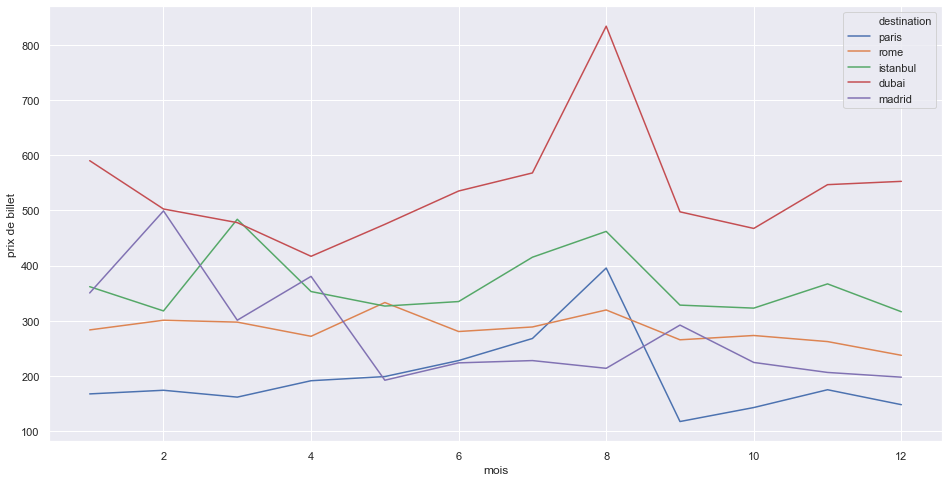

In [244]:
#visualization de la target en fonction du temps parraport au déffirentes destination 

plt.figure(figsize=(16,8))
ax = sns.lineplot(x= 'mois', y ='prix de billet',data=df, hue='destination', ci=None)


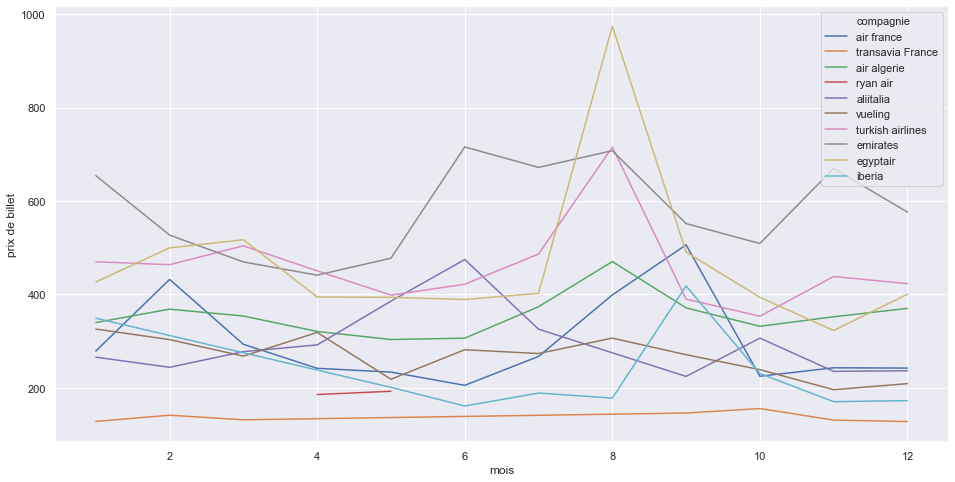

In [245]:
#visualization de la target en fonction du temps parraport au déffirentes compagnie aerienne 

plt.figure(figsize=(16,8))
ag = sns.lineplot(x= 'mois', y ='prix de billet',data=df, hue='compagnie', ci=None)

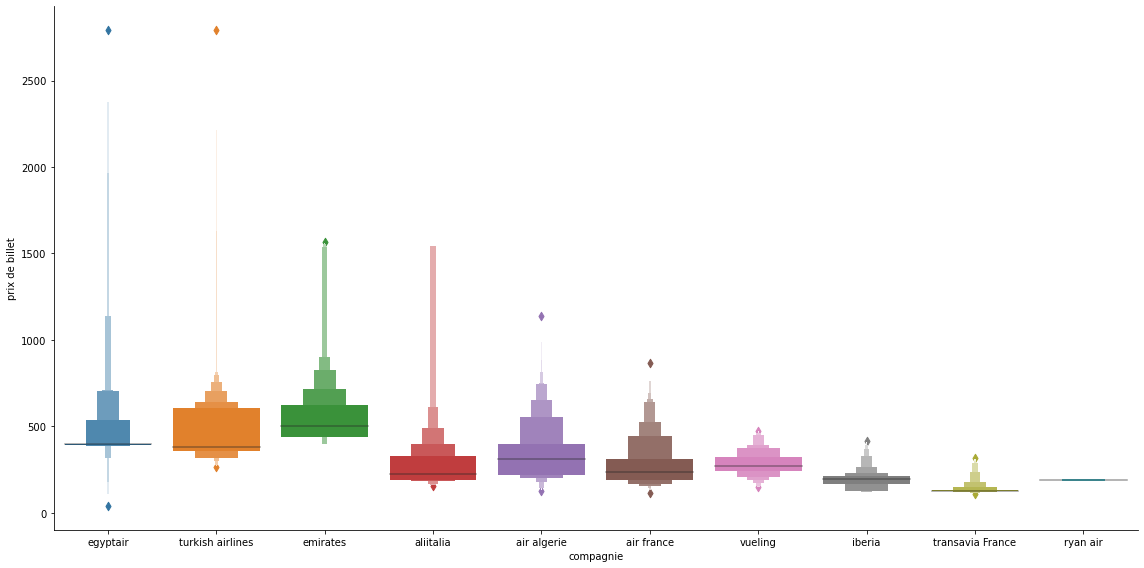

In [207]:
#visualization de la variance du target chez chaque compagnie aerienne 
sns.catplot(x = "compagnie", y = "prix de billet", data = df.sort_values("prix de billet", ascending = False), kind="boxen", height = 8, aspect = 2)


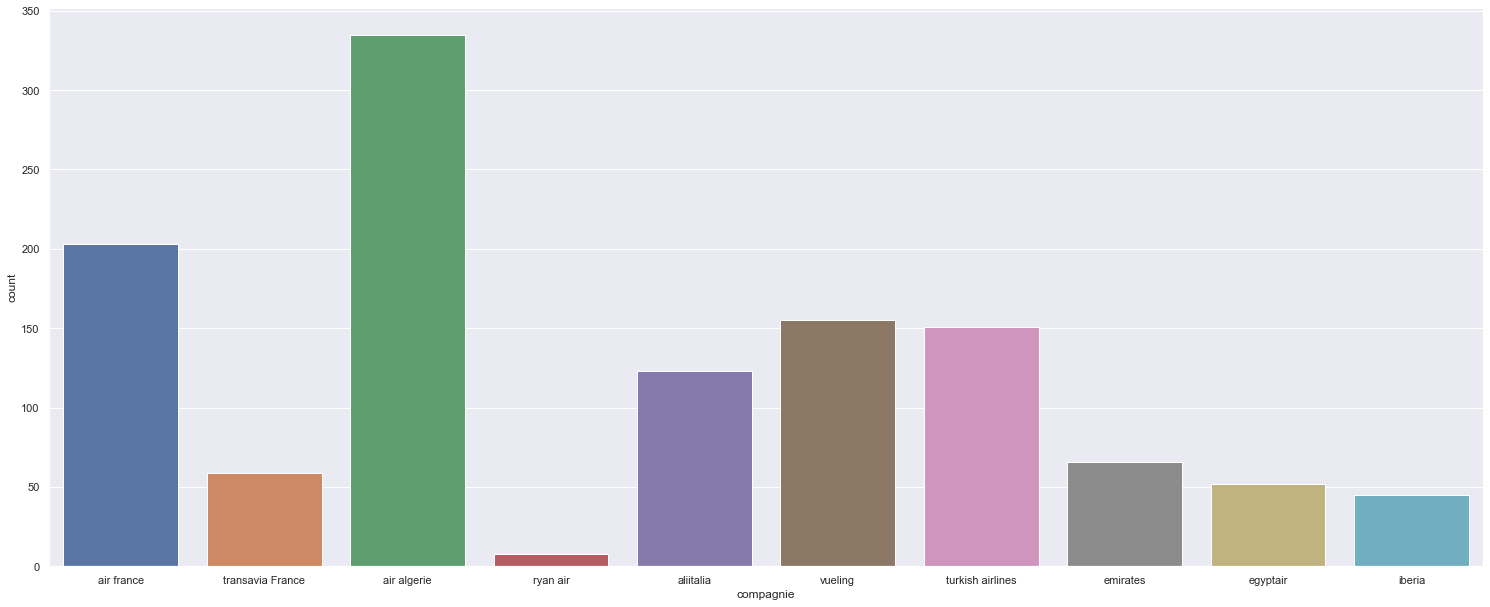

In [241]:
#Aficher le nombre d'offre du chaque compagnie dans la dataset
sns.set(rc={'figure.figsize':(25.7,10.27)})
sns.countplot(df['compagnie'])

# 2. pre-processing :

In [256]:
dfp = df.copy()

In [257]:
dfp.drop(['date_départ'], axis=1, inplace=True)

In [259]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(dfp, test_size=0.2, random_state=0)

In [262]:
#appliquer le one hot encoding sur le trainset et le testset
def preprocessing(df):
    compagnie_ = df[["destination"]]
    compagnie_ = df[["compagnie"]]
    destination_ = pd.get_dummies(compagnie_ , drop_first= True)
    compagnie_ = pd.get_dummies(compagnie_ , drop_first= True)

    df = pd.concat([df, destination_, compagnie_], axis = 1)
    return df

In [263]:
trainset = preprocessing(trainset)
testset = preprocessing(testset)


In [264]:
trainset.drop(["compagnie", "destination"], axis = 1, inplace = True)
testset.drop(["compagnie", "destination"], axis = 1, inplace = True)

X_train = trainset.drop('prix de billet', axis=1)
X_test = testset.drop('prix de billet', axis=1)
y_train = trainset['prix de billet']
y_test = testset['prix de billet']


In [265]:
modele = LinearRegression()
modele.fit(X_train, y_train)

modele.score(X_test, y_test)

0.2876007917160832

# feature engineering :

In [266]:
#création de la variable retour (date de retour) à partir de date de départ
for i, row in df.iterrows():
    df.loc[i, 'retour'] =row['date_départ'] + timedelta(days=int(row['durée_sejour']))


In [288]:
dft = df.copy()
dft.head()

,destination,date_départ,escale,durée_sejour,prix de billet,compagnie,jour,mois,retour
0,paris,2020-12-12,0,1,115,air france,12,12,2020-12-13
1,paris,2020-09-24,0,1,113,transavia France,24,9,2020-09-25
2,paris,2020-09-21,0,4,113,transavia France,21,9,2020-09-25
3,paris,2020-09-18,0,3,117,transavia France,18,9,2020-09-21
4,paris,2020-09-22,0,96,118,transavia France,22,9,2020-12-27


In [289]:
def crt(df):
    for i, row in df.iterrows():
        if (row['destination']=='paris'):
            if(row['compagnie']=='air algerie'):
                if ( 210 <= row['prix de billet']) and (row['escale']==0):
                        df.loc[i,'durée_vol']='2h 10m'
                        df.loc[i,'inter_voyage']=random.choice(['11:30 14:40','13:30  15:40', '16:10 18:20'])
                elif( 210 > row['prix de billet']) and (row['escale']==0):
                        df.loc[i,'durée_vol']='2h 20m'
                        df.loc[i,'inter_voyage']=random.choice(['09:30 11:50','13:30  15:50', '16:10 18:30'])
                elif(row['escale']==1):
                        df.loc[i,'durée_vol']='12h 30m'
                        df.loc[i,'inter_voyage']=random.choice(['20:10 06:40','10:30  23:00', '14:10 12:30'])
                
                
            if(row['compagnie']=='air france') | (row['compagnie']=='transavia France'):
                
                if(row['escale']==0):
                        df.loc[i,'durée_vol']='2h 20m'
                        df.loc[i,'inter_voyage']=random.choice(['09:30 11:50','13:30  15:50', '16:10 18:30'])
                elif(row['escale']==1):
                            df.loc[i,'durée_vol']='09h 30m'
                            df.loc[i,'inter_voyage']=random.choice(['10:10 19:40','10:30  20:00', '06:10 15:40'])
                        
            if(row['compagnie']=='aliitalia'):
                
                if (row['escale']==0):
                        df.loc[i,'durée_vol']='2h 20m'
                        df.loc[i,'inter_voyage']=random.choice(['09:30 11:50','13:30  15:50', '16:10 18:30'])
                elif(row['escale']==1):
                    df.loc[i,'durée_vol']='10h 50m'
                    df.loc[i,'inter_voyage']=random.choice(['09:10 20:00','11:30  22:20', '14:10 01:00'])
                    
            if(row['compagnie']=='vueling'):
                
                if (row['escale']==0):
                        df.loc[i,'durée_vol']='2h 20m'
                        df.loc[i,'inter_voyage']=random.choice(['09:30 11:50','13:30  15:50', '16:10 18:30'])
                elif (row['escale']==1):
                        df.loc[i,'durée_vol']='10h 50m'
                        df.loc[i,'inter_voyage']=random.choice(['09:10 20:00','11:30  22:20', '14:10 01:00'])
                else:
                        df.loc[i,'durée_vol']='19h 10m'
                        df.loc[i,'inter_voyage']=random.choice(['07:10 02:20','11:30  06:40', '15:10 10:20'])
                    
            if(row['compagnie']=='ryan air'):
                    
                    if ( 190 <= row['prix de billet']):
                        df.loc[i,'durée_vol']='2h 10m'
                        df.loc[i,'inter_voyage']=random.choice(['09:30 11:50','13:30  15:50', '16:10 18:30'])
                    else:
                            df.loc[i,'durée_vol']='2h 20m'
                            df.loc[i,'inter_voyage']=random.choice(['09:30 12:00','23:30  01:50', '08:10 10:30'])
                            
        elif(row['destination']=='dubai'):
            
            if(row['compagnie']=='emirates'):
                if ( 500 <= row['prix de billet']) and (row['escale']==0):
                        df.loc[i,'durée_vol']='7h 30m'
                        df.loc[i,'inter_voyage']=random.choice(['10:30 17:00','13:30 21:00', '06:10 14:40'])
                elif( 500 > row['prix de billet']) and (row['escale']==0):
                        df.loc[i,'durée_vol']='6h 30m'
                        df.loc[i,'inter_voyage']=random.choice(['09:30 16:00','13:30 20:00', '16:10 22:40'])
                elif(row['escale']==1):
                        df.loc[i,'durée_vol']='11h 30m'
                        df.loc[i,'inter_voyage']=random.choice(['20:10 07:40','10:30 22:00', '14:10 01:40'])
                if ( 600 <= row['prix de billet']) and (row['escale']==2):
                        df.loc[i,'durée_vol']='15h 30m'
                        df.loc[i,'inter_voyage']=random.choice(['05:30 21:00','13:30 05:00', '18:10 09:40'])
                elif( 600 > row['prix de billet']) and (row['escale']==2):
                        df.loc[i,'durée_vol']='6h 30m'
                        df.loc[i,'inter_voyage']=random.choice(['09:30 15:00','13:30  20:00', '16:10 22:40'])
                
            elif(row['compagnie']=='turkish airlines'):
                    
                    if ( 400 <= row['prix de billet']) and (row['escale']==0):
                        df.loc[i,'durée_vol']='7h 30m'
                        df.loc[i,'inter_voyage']=random.choice(['10:30 17:00','13:30 21:00', '06:10 14:40'])
                    elif( 400 > row['prix de billet']) and (row['escale']==0):
                        df.loc[i,'durée_vol']='6h 30m'
                        df.loc[i,'inter_voyage']=random.choice(['09:30 16:00','13:30 20:00', '16:10 22:40'])
                    elif( 500 <= row['prix de billet']) and (row['escale']==1):
                        df.loc[i,'durée_vol']='11h 00m'
                        df.loc[i,'inter_voyage']=random.choice(['08:10 17:10','12:30 23:30', '11:10 22:00'])
                    elif( 500 > row['prix de billet']) and (row['escale']==1):
                        df.loc[i,'durée_vol']='10h 20m'
                        df.loc[i,'inter_voyage']=random.choice(['22:10 08:30','15:30 01:50', '04:10 14:30'])
                    elif( 400 <= row['prix de billet']) and (row['escale']==2):
                        df.loc[i,'durée_vol']='19h 30m'
                        df.loc[i,'inter_voyage']=random.choice(['05:30 00:00','13:30 09:00', '08:10 03:40'])
                    elif( 400 > row['prix de billet']) and (row['escale']==2):
                        df.loc[i,'durée_vol']='16h 30m'
                        df.loc[i,'inter_voyage']=random.choice(['11:30 04:00','15:30 08:00', '16:30 09:00'])
                    elif(row['escale']==3):
                        df.loc[i,'durée_vol']='21h 00m'
                        df.loc[i,'inter_voyage']=random.choice(['09:30 06:30','13:30 10:30', '16:10 13:10'])
                        
            elif(row['compagnie']=='air algerie'):
                    if ( 500 <= row['prix de billet']) and (row['escale']==0):
                        df.loc[i,'durée_vol']='7h 30m'
                        df.loc[i,'inter_voyage']=random.choice(['11:30 18:00','11:30 19:00', '09:10 17:40'])
                    elif( 500 > row['prix de billet']) and (row['escale']==0):
                        df.loc[i,'durée_vol']='6h 30m'
                        df.loc[i,'inter_voyage']=random.choice(['09:00 15:30','16:30 23:00', '12:10 18:40'])
                    elif( 700 <= row['prix de billet']) and (row['escale']==1):
                        df.loc[i,'durée_vol']='11h 05m'
                        df.loc[i,'inter_voyage']=random.choice(['10:10 19:15','10:30 21:35', '10:15 21:10'])
                    elif( 700 > row['prix de billet']) and (row['escale']==1):
                        df.loc[i,'durée_vol']='10h 20m'
                        df.loc[i,'inter_voyage']=random.choice(['20:40 07:00','13:30 23:50', '05:10 15:30'])
                    elif( 400 <= row['prix de billet']) and (row['escale']==2):
                        df.loc[i,'durée_vol']='17h 30m'
                        df.loc[i,'inter_voyage']=random.choice(['05:30 22:00','11:30 05:00', '08:10 01:40'])
                    elif( 400 > row['prix de billet']) and (row['escale']==2):
                        df.loc[i,'durée_vol']='16h 30m'
                        df.loc[i,'inter_voyage']=random.choice(['10:30 03:00','16:30 09:00', '17:30 10:00'])

            elif(row['compagnie']=='egyptair'):
                        if ( 400 <= row['prix de billet']) and (row['escale']==0):
                            df.loc[i,'durée_vol']='7h 30m'
                            df.loc[i,'inter_voyage']=random.choice(['10:30 17:00','11:30 19:00', '09:00 17:30'])
                        elif( 400 > row['prix de billet']) and (row['escale']==0):
                            df.loc[i,'durée_vol']='6h 30m'
                            df.loc[i,'inter_voyage']=random.choice(['10:00 16:30','15:30 22:00', '13:10 19:40'])
                        elif( 500 <= row['prix de billet']) and (row['escale']==1):
                            df.loc[i,'durée_vol']='11h 10m'
                            df.loc[i,'inter_voyage']=random.choice(['10:10 19:20','10:30 21:40', '10:15 21:15'])
                        elif( 500 > row['prix de billet']) and (row['escale']==1):
                            df.loc[i,'durée_vol']='10h 25m'
                            df.loc[i,'inter_voyage']=random.choice(['20:35 07:00','13:30 23:55', '05:05 15:30'])
                        elif( 400 <= row['prix de billet']) and (row['escale']==2):
                            df.loc[i,'durée_vol']='19h 30m'
                            df.loc[i,'inter_voyage']=random.choice(['03:30 22:00','11:30 07:00', '06:30 01:20'])
                        elif( 400 > row['prix de billet']) and (row['escale']==2):
                                df.loc[i,'durée_vol']='17h 30m'
                                df.loc[i,'inter_voyage']=random.choice(['09:30 03:00','15:30 09:00', '17:00 10:30'])
                        elif(row['escale']==3):
                                df.loc[i,'durée_vol']='22h 00m'
                                df.loc[i,'inter_voyage']=random.choice(['09:30 07:30','12:30 10:30', '10:35 08:35'])        
                                
                                
            elif(row['compagnie']=='aliitalia'):
                        if ( 700 <= row['prix de billet']) and (row['escale']==2):
                                df.loc[i,'durée_vol']='11h 30m'
                                df.loc[i,'inter_voyage']=random.choice(['10:00 21:30','11:30 23:00', '09:00 21:30'])
                        elif( 700 > row['prix de billet']) and (row['escale']==2):
                                df.loc[i,'durée_vol']='10h 00m'
                                df.loc[i,'inter_voyage']=random.choice(['12:00 22:00','04:30 14:30', '13:10 23:40'])
            elif(row['compagnie']=='air france'):
                        if ( 600 <= row['prix de billet']) and (row['escale']==2):
                                df.loc[i,'durée_vol']='11h 30m'
                                df.loc[i,'inter_voyage']=random.choice(['08:00 19:30','10:00 21:30', '11:00 23:30'])
            elif( 600 > row['prix de billet']) and (row['escale']==2):
                                df.loc[i,'durée_vol']='10h 30m'
                                df.loc[i,'inter_voyage']=random.choice(['08:00 18:30','01:30 12:00', '13:10 23:40'])

        elif(row['destination']=='madrid'):
            
            
            if(row['compagnie']=='vueling'):
                        if ( 250 <= row['prix de billet']) and (row['escale']==0):
                            df.loc[i,'durée_vol']='1h 35m'
                            df.loc[i,'inter_voyage']=random.choice(['10:30 12:05','11:30 13:05', '19:00 20:35'])
                        elif( 250 > row['prix de billet']) and (row['escale']==0):
                            df.loc[i,'durée_vol']='1h 30m'
                            df.loc[i,'inter_voyage']=random.choice(['10:00 11:30','05:30 07:00', '13:10 14:40'])
                        elif( 300 <= row['prix de billet']) and (row['escale']==1):
                            df.loc[i,'durée_vol']='05h 30m'
                            df.loc[i,'inter_voyage']=random.choice(['10:10 15:40','08:30 13:30', '10:15 15:45'])
                        elif( 300 > row['prix de billet']) and (row['escale']==1):
                            df.loc[i,'durée_vol']='04h 40m'
                            df.loc[i,'inter_voyage']=random.choice(['20:35 01:15','11:30 16:10', '05:00 09:40'])
            elif(row['compagnie']=='air france'):
                        if ( 250 <= row['prix de billet']) and (row['escale']==0):
                            df.loc[i,'durée_vol']='1h 35m'
                            df.loc[i,'inter_voyage']=random.choice(['10:30 12:05','11:30 13:05', '19:00 20:35'])
                        elif( 250 > row['prix de billet']) and (row['escale']==0):
                            df.loc[i,'durée_vol']='1h 30m'
                            df.loc[i,'inter_voyage']=random.choice(['10:00 11:30','05:30 07:00', '13:10 14:40'])
                        elif( 242 <= row['prix de billet']) and (row['escale']==1):
                            df.loc[i,'durée_vol']='05h 35m'
                            df.loc[i,'inter_voyage']=random.choice(['10:05 15:30','08:35 13:40', '10:20 15:55'])
                        elif( 242 > row['prix de billet']) and (row['escale']==1):
                            df.loc[i,'durée_vol']='04h 40m'
                            df.loc[i,'inter_voyage']=random.choice(['20:35 01:15','11:30 16:10', '05:00 09:40'])
                        elif( 624 <= row['prix de billet']) and (row['escale']==2):
                            df.loc[i,'durée_vol']='19h 30m'
                            df.loc[i,'inter_voyage']=random.choice(['03:30 22:00','11:30 07:00', '06:30 01:20'])
                        elif( 624 > row['prix de billet']) and (row['escale']==2):
                            df.loc[i,'durée_vol']='17h 30m'
                            df.loc[i,'inter_voyage']=random.choice(['09:30 03:00','15:30 09:00', '17:00 10:30'])      

            elif(row['compagnie']=='air algerie'):
                        if ( 250 <= row['prix de billet']) and (row['escale']==0):
                            df.loc[i,'durée_vol']='1h 35m'
                            df.loc[i,'inter_voyage']=random.choice(['10:30 12:05','11:30 13:05', '19:00 20:35'])
                        elif( 250 > row['prix de billet']) and (row['escale']==0):
                            df.loc[i,'durée_vol']='01h 30m'
                            df.loc[i,'inter_voyage']=random.choice(['10:00 11:30','05:30 07:00', '13:10 14:40'])
                        elif( 300 <= row['prix de billet']) and (row['escale']==1):
                            df.loc[i,'durée_vol']='03h 35m'
                            df.loc[i,'inter_voyage']=random.choice(['09:05 12:40','09:35 13:10', '10:20 14:55'])
                        elif( 300 > row['prix de billet']) and (row['escale']==1):
                            df.loc[i,'durée_vol']='04h 40m'                
                            df.loc[i,'inter_voyage']=random.choice(['20:35 01:15','11:30 16:10', '05:00 09:40'])
                            
            elif(row['compagnie']=='iberia'):
                        if ( 200 <= row['prix de billet']) and (row['escale']==0):
                            df.loc[i,'durée_vol']='1h 35m'
                            df.loc[i,'inter_voyage']=random.choice(['10:30 12:05','11:30 13:05', '19:00 20:35'])
                        elif( 200 > row['prix de billet']) and (row['escale']==0):
                            df.loc[i,'durée_vol']='01h 30m'
                            df.loc[i,'inter_voyage']=random.choice(['10:00 11:30','05:30 07:00', '13:10 14:40'])
                        elif( 300 <= row['prix de billet']) and (row['escale']==1):
                            df.loc[i,'durée_vol']='05h 35m'
                            df.loc[i,'inter_voyage']=random.choice(['19:05 02:30','09:35 15:40', '10:20 16:55'])
                        elif( 300 > row['prix de billet']) and (row['escale']==1):
                            df.loc[i,'durée_vol']='04h 20m'                
                            df.loc[i,'inter_voyage']=random.choice(['20:35 00:55','10:50 15:10', '01:20 05:40'])
                            
            elif(row['compagnie']=='aliitalia'):
                        if (row['escale']==0):
                            df.loc[i,'durée_vol']='1h 35m'
                            df.loc[i,'inter_voyage']=random.choice(['10:30 12:05','11:30 13:05', '19:00 20:35'])
                        elif( 200 <= row['prix de billet']) and (row['escale']==1):
                            df.loc[i,'durée_vol']='05h 45m'
                            df.loc[i,'inter_voyage']=random.choice(['09:05 17:40','07:15 13:40', '10:10 16:55'])
                        elif( 200 > row['prix de billet']) and (row['escale']==1):
                            df.loc[i,'durée_vol']='04h 40m'                
                            df.loc[i,'inter_voyage']=random.choice(['12:35 17:15','08:30 13:10', '05:00 09:40'])  
                            
            elif(row['compagnie']=='turkish airlines'):
                
                        if ( 500 <= row['prix de billet']) and (row['escale']==0):
                            df.loc[i,'durée_vol']='1h 35m'
                            df.loc[i,'inter_voyage']=random.choice(['10:30 12:05','08:30 10:05', '15:00 16:35'])
                        elif( 500 > row['prix de billet']) and (row['escale']==0):
                            df.loc[i,'durée_vol']='01h 30m'
                            df.loc[i,'inter_voyage']=random.choice(['01:00 02:30','04:30 06:00', '13:10 14:40'])
                        elif(row['escale']==1):
                            df.loc[i,'durée_vol']='05h 35m'
                            df.loc[i,'inter_voyage']=random.choice(['19:05 02:30','09:35 15:40', '10:20 16:55'])
                        elif(row['escale']==3):
                            df.loc[i,'durée_vol']='10h 20m'                
                            df.loc[i,'inter_voyage']=random.choice(['02:35 12:55','10:50 21:10', '01:20 10:40'])
            elif(row['compagnie']=='transavia France'):
                        if (row['escale']==0):
                            df.loc[i,'durée_vol']='1h 30m'
                            df.loc[i,'inter_voyage']=random.choice(['10:30 12:00','11:00 13:30', '19:10 20:20'])
                        elif( 300 <= row['prix de billet']) and (row['escale']==1):
                            df.loc[i,'durée_vol']='05h 45m'
                            df.loc[i,'inter_voyage']=random.choice(['09:05 17:40','07:15 13:40', '10:10 16:55'])
                        elif( 300 > row['prix de billet']) and (row['escale']==1):
                            df.loc[i,'durée_vol']='04h 40m'                
                            df.loc[i,'inter_voyage']=random.choice(['12:35 17:15','08:30 13:10', '05:00 09:40'])  
                            
        elif(row['destination']=='istanbul'): 
            if(row['compagnie']=='air algerie'):
                        if ( 400 <= row['prix de billet']) and (row['escale']==0):
                            df.loc[i,'durée_vol']='3h 45m'
                            df.loc[i,'inter_voyage']=random.choice(['10:30 14:15','11:30 15:15', '19:00 22:45'])
                        elif( 400 > row['prix de billet']) and (row['escale']==0):
                            df.loc[i,'durée_vol']='03h 30m'
                            df.loc[i,'inter_voyage']=random.choice(['10:00 13:30','05:30 09:00', '13:10 16:40'])
                        elif( 300 <= row['prix de billet']) and (row['escale']==1):
                            df.loc[i,'durée_vol']='08h 35m'
                            df.loc[i,'inter_voyage']=random.choice(['09:05 17:40','09:35 18:10', '05:20 13:55'])
                        elif( 300 > row['prix de billet']) and (row['escale']==1):
                            df.loc[i,'durée_vol']='07h 45m'                
                            df.loc[i,'inter_voyage']=random.choice(['20:40 04:20','08:30 16:15', '05:00 12:45'])
                            
            elif(row['compagnie']=='turkish airlines'):
                        if ( 250 <= row['prix de billet']) and (row['escale']==1):
                            df.loc[i,'durée_vol']='3h 45m'
                            df.loc[i,'inter_voyage']=random.choice(['10:30 13:55','11:30 14:55', '09:00 12:25'])
                        elif( 250 > row['prix de billet']) and (row['escale']==1):
                            df.loc[i,'durée_vol']='01h 30m'
                            df.loc[i,'inter_voyage']=random.choice(['10:00 11:30','05:30 07:00', '13:10 14:40'])
                        elif( 300 <= row['prix de billet']) and (row['escale']==0):
                            df.loc[i,'durée_vol']='03h 45m'
                            df.loc[i,'inter_voyage']=random.choice(['09:05 12:50','15:30 19:15', '12:20 16:05'])
                        elif( 300 > row['prix de billet']) and (row['escale']==0):
                            df.loc[i,'durée_vol']='03h 25m'                
                            df.loc[i,'inter_voyage']=random.choice(['20:35 00:00','11:30 14:55', '05:00 08:25'])
 
            elif(row['compagnie']=='air france'):
                    if ( 250 <= row['prix de billet']) and (row['escale']==0):
                        df.loc[i,'durée_vol']='1h 35m'
                        df.loc[i,'inter_voyage']=random.choice(['10:30 12:05','11:30 13:05', '19:00 20:35'])
                    elif( 250 > row['prix de billet']) and (row['escale']==0):
                        df.loc[i,'durée_vol']='1h 30m'
                        df.loc[i,'inter_voyage']=random.choice(['10:00 11:30','05:30 07:00', '13:10 14:40'])
                    elif( 300 <= row['prix de billet']) and (row['escale']==1):
                        df.loc[i,'durée_vol']='12h 20m'
                        df.loc[i,'inter_voyage']=random.choice(['10:05 20:25','08:35 21:00', '10:20 20:40'])
                    elif( 300 > row['prix de billet']) and (row['escale']==1):
                        df.loc[i,'durée_vol']='09h 20m'
                        df.loc[i,'inter_voyage']=random.choice(['20:35 05:55','11:30 21:40', '05:00 14:20'])
                    elif(row['escale']==2):
                        df.loc[i,'durée_vol']='17h 30m'
                        df.loc[i,'inter_voyage']=random.choice(['09:30 03:00','15:30 09:00', '17:00 10:30'])      
                            
            elif(row['compagnie']=='aliitalia'):
                        if(row['escale']==0):
                            df.loc[i,'durée_vol']='1h 40m'
                            df.loc[i,'inter_voyage']=random.choice(['10:30 12:10','11:25 13:05', '19:00 20:40'])
                        elif( 300 <= row['prix de billet']) and (row['escale']==1):
                            df.loc[i,'durée_vol']='09h 30m'
                            df.loc[i,'inter_voyage']=random.choice(['09:05 18:35','09:35 19:05', '10:20 19:50'])
                        elif( 300 > row['prix de billet']) and (row['escale']==1):
                            df.loc[i,'durée_vol']='08h 40m'                
                            df.loc[i,'inter_voyage']=random.choice(['16:35 01:15','11:30 20:10', '01:00 09:40'])
                 
        elif(row['destination']=='rome'):    
            if(row['compagnie']=='aliitalia'):
                        if ( 250 <= row['prix de billet']) and (row['escale']==0):
                            df.loc[i,'durée_vol']='1h 55m'
                            df.loc[i,'inter_voyage']=random.choice(['10:30 12:25','11:30 13:25', '10:00 12:55'])
                        elif( 250 > row['prix de billet']) and (row['escale']==0):
                            df.loc[i,'durée_vol']='01h 45m'
                            df.loc[i,'inter_voyage']=random.choice(['10:00 12:45','05:30 07:15', '13:10 15:05'])
                        elif(row['escale']==1):
                            df.loc[i,'durée_vol']='07h 35m'
                            df.loc[i,'inter_voyage']=random.choice(['09:05 16:40','05:35 13:10', '07:20 14:55'])
            elif(row['compagnie']=='vueling'):
                        if ( 300 <= row['prix de billet']) and (row['escale']==0):
                            df.loc[i,'durée_vol']='02h 10m'
                            df.loc[i,'inter_voyage']=random.choice(['23:30 01:40','11:30 13:40', '08:00 10:10'])
                        elif( 300 > row['prix de billet']) and (row['escale']==0):
                            df.loc[i,'durée_vol']='02h 00m'
                            df.loc[i,'inter_voyage']=random.choice(['10:00 12:00','05:30 07:30', '13:10 14:10'])
                        elif( 250 <= row['prix de billet']) and (row['escale']==1):
                            df.loc[i,'durée_vol']='05h 35m'
                            df.loc[i,'inter_voyage']=random.choice(['09:05 14:40','19:35 01:10', '10:20 15:55'])
                        elif( 250 > row['prix de billet']) and (row['escale']==1):
                            df.loc[i,'durée_vol']='05h 15m'                
                            df.loc[i,'inter_voyage']=random.choice(['20:35 01:50','11:30 16:45', '05:00 10:15'])
                        elif( 250 <= row['prix de billet']) and (row['escale']==2):
                            df.loc[i,'durée_vol']='09h 35m'
                            df.loc[i,'inter_voyage']=random.choice(['09:05 18:40','03:35 13:10', '06:20 14:55'])
                        elif( 250 > row['prix de billet']) and (row['escale']==2):
                            df.loc[i,'durée_vol']='07h 40m'                
                            df.loc[i,'inter_voyage']=random.choice(['17:35 01:15','11:30 19:10', '02:00 09:40'])
                            
            elif(row['compagnie']=='air france'):
                        if ( 200 <= row['prix de billet']) and (row['escale']==0):
                            df.loc[i,'durée_vol']='02h 10m'
                            df.loc[i,'inter_voyage']=random.choice(['23:00 01:10','11:34 13:44', '08:20 10:30'])
                        elif( 200 > row['prix de billet']) and (row['escale']==0):
                            df.loc[i,'durée_vol']='02h 00m'
                            df.loc[i,'inter_voyage']=random.choice(['08:00 10:00','06:21 08:21', '13:14 14:14'])
                        elif( 300 <= row['prix de billet']) and (row['escale']==1):
                            df.loc[i,'durée_vol']='05h 35m'
                            df.loc[i,'inter_voyage']=random.choice(['10:05 15:40','20:35 02:10', '11:20 16:55'])
                        elif( 300 > row['prix de billet']) and (row['escale']==1):
                            df.loc[i,'durée_vol']='05h 15m'                
                            df.loc[i,'inter_voyage']=random.choice(['18:35 23:50','14:30 19:45', '04:00 09:15'])
                            
            elif(row['compagnie']=='air algerie'):
                        if ( 300 <= row['prix de billet']) and (row['escale']==0):
                            df.loc[i,'durée_vol']='02h 10m'
                            df.loc[i,'inter_voyage']=random.choice(['23:39 01:49','11:10 13:20', '07:00 09:10'])
                        elif( 300 > row['prix de billet']) and (row['escale']==0):
                            df.loc[i,'durée_vol']='02h 00m'
                            df.loc[i,'inter_voyage']=random.choice(['10:07 12:07','05:20 07:20', '13:52 14:52'])
                        elif( 200 <= row['prix de billet']) and (row['escale']==1):
                            df.loc[i,'durée_vol']='05h 35m'
                            df.loc[i,'inter_voyage']=random.choice(['09:04 14:39','22:35 04:10', '11:20 16:55'])
                        elif( 200 > row['prix de billet']) and (row['escale']==1):
                            df.loc[i,'durée_vol']='05h 15m'                
                            df.loc[i,'inter_voyage']=random.choice(['20:35 01:50','11:30 16:45', '06:00 11:15'])

In [291]:
dft.head()

,destination,date_départ,escale,durée_sejour,prix de billet,compagnie,jour,mois,retour,durée_vol,inter_voyage
0,paris,2020-12-12,0,1,115,air france,12,12,2020-12-13,2h 20m,13:30 15:50
1,paris,2020-09-24,0,1,113,transavia France,24,9,2020-09-25,2h 20m,13:30 15:50
2,paris,2020-09-21,0,4,113,transavia France,21,9,2020-09-25,2h 20m,16:10 18:30
3,paris,2020-09-18,0,3,117,transavia France,18,9,2020-09-21,2h 20m,16:10 18:30
4,paris,2020-09-22,0,96,118,transavia France,22,9,2020-12-27,2h 20m,09:30 11:50


In [290]:
crt(dft)

In [292]:
dft.isnull().sum()

destination       0
date_départ       0
escale            0
durée_sejour      0
prix de billet    0
compagnie         0
jour              0
mois              0
retour            0
durée_vol         0
inter_voyage      0
dtype: int64

In [293]:
#création des colonnes jour de départ et mois de départ jour de retour et mois de retour
def create_sej(df):
    df['jour_départ'] = pd.to_datetime(df.date_départ, format="%Y-%m-%d").dt.day
    df['mois_départ'] = pd.to_datetime(df.date_départ, format="%Y-%m-%d").dt.month
    df['jour_retour'] = pd.to_datetime(df.retour, format="%Y-%m-%d").dt.day
    df['mois_retour'] = pd.to_datetime(df.retour, format="%Y-%m-%d").dt.month 
    return df

In [294]:
#appliquer create_sej a dft
dft = create_sej(dft)

In [295]:
#fonction pour lacréation  des colonnes ('durée_heures'+'durée_min')=durée du vol,'heure de départ', 
#'minute de départ' ainsi que l'heure d'arivée et la minute d'arivée.
def add(df):
    for i, row in df.iterrows():
        df.loc[i, 'durée_heures'] = str(row['durée_vol']).split('h')[0]
        df.loc[i, 'durée_min'] = str(row['durée_vol']).split(' ')[1].split('m')[0]
        df.loc[i, 'heure_départ'] = row['inter_voyage'].split(':')[0]
        df.loc[i, 'min_départ'] = row['inter_voyage'].split(':')[1].split(' ')[0]
        df.loc[i, 'heure_arivée'] = row['inter_voyage'].split(' ')[-1].split(':')[0]
        df.loc[i, 'min_arivée'] = row['inter_voyage'].split(' ')[-1].split(':')[1]
    return df

In [296]:
#appliquer add a dft
dft = add(dft)

In [301]:
dft.head()

,destination,escale,durée_sejour,prix de billet,compagnie,jour_départ,mois_départ,jour_retour,mois_retour,durée_heures,durée_min,heure_départ,min_départ,heure_arivée,min_arivée
0,paris,0,1,115,air france,12,12,13,12,2,20,13,30,15,50
1,paris,0,1,113,transavia France,24,9,25,9,2,20,13,30,15,50
2,paris,0,4,113,transavia France,21,9,25,9,2,20,16,10,18,30
3,paris,0,3,117,transavia France,18,9,21,9,2,20,16,10,18,30
4,paris,0,96,118,transavia France,22,9,27,12,2,20,09,30,11,50


In [298]:
dft.drop(['date_départ', 'retour', 'durée_vol', 'inter_voyage', 'jour', 'mois'], axis=1, inplace=True)

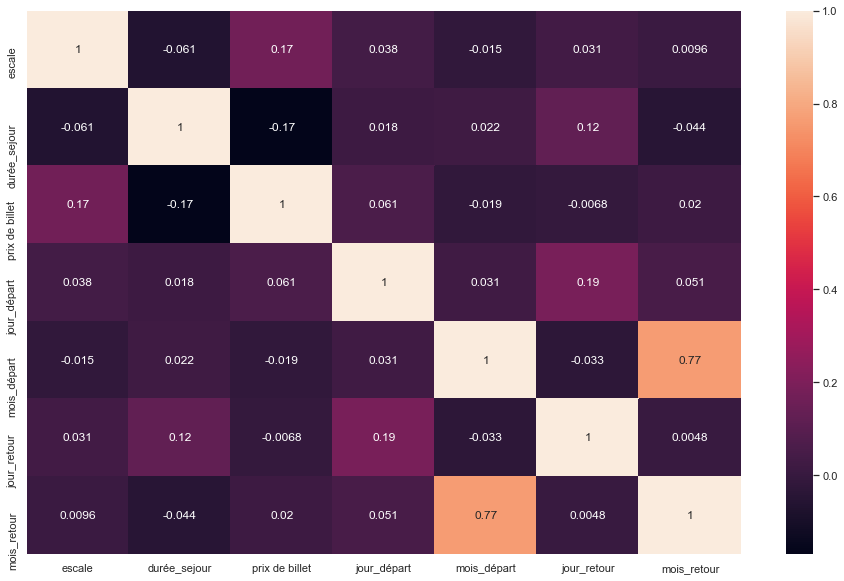

In [405]:
#visualizer les corrélations entre les variables avec heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(dft.corr(), annot=True)

In [302]:
#création d'un trainset et d'un testset 
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(dft, test_size=0.2, random_state=0)

In [306]:
#appliquer le one hot encoding sur le trainset et le testset
def preprocessing(df):
    destination_ = df[["destination"]]
    compagnie_ = df[["compagnie"]]
    destination_ = pd.get_dummies(destination_ , drop_first= True)
    compagnie_ = pd.get_dummies(compagnie_ , drop_first= True)

    df = pd.concat([df, destination_, compagnie_], axis = 1)
    return df

In [314]:
X_train.shape

(957, 25)

In [309]:
trainset = preprocessing(trainset)
testset = preprocessing(testset)

In [311]:
#
trainset.drop(["compagnie", "destination"], axis = 1, inplace = True)
testset.drop(["compagnie", "destination"], axis = 1, inplace = True)
X_train = trainset.drop('prix de billet', axis=1)
X_test = testset.drop('prix de billet', axis=1)
y_train = trainset['prix de billet']
y_test = testset['prix de billet']

In [315]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(957, 25)
(957,)
(240, 25)
(240,)


In [316]:
#importer tous les modéls et les outils utilisés dans face de modélisation
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor, GradientBoostingRegressor , VotingRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression, ridge_regression, SGDRegressor, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#évaluer des models avec leurs paramétres de base

In [365]:
model_1 =RandomForestRegressor(random_state=0)
model_1.fit(X_train, y_train)
model_1.score(X_test, y_test)

0.8327960901965529

In [366]:
model_2 = ExtraTreesRegressor(random_state=0)
model_2.fit(X_train, y_train)
model_2.score(X_test, y_test)

0.8403021653286523

In [322]:
model_3 = GradientBoostingRegressor(random_state=0)
model_3.fit(X_train, y_train)
model_3.score(X_test, y_test)

0.790960390806488

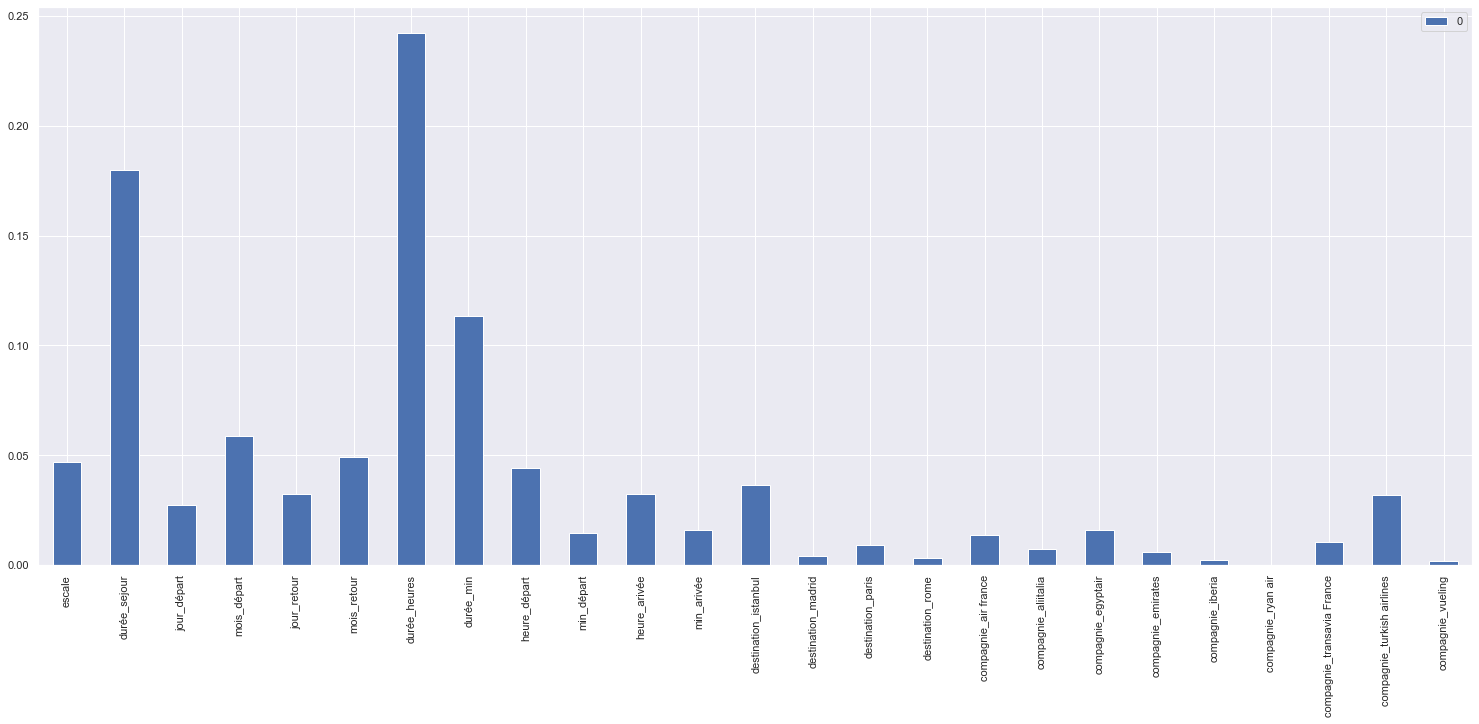

In [319]:
pd.DataFrame(model_1.feature_importances_, index = X_train.columns).plot.bar()

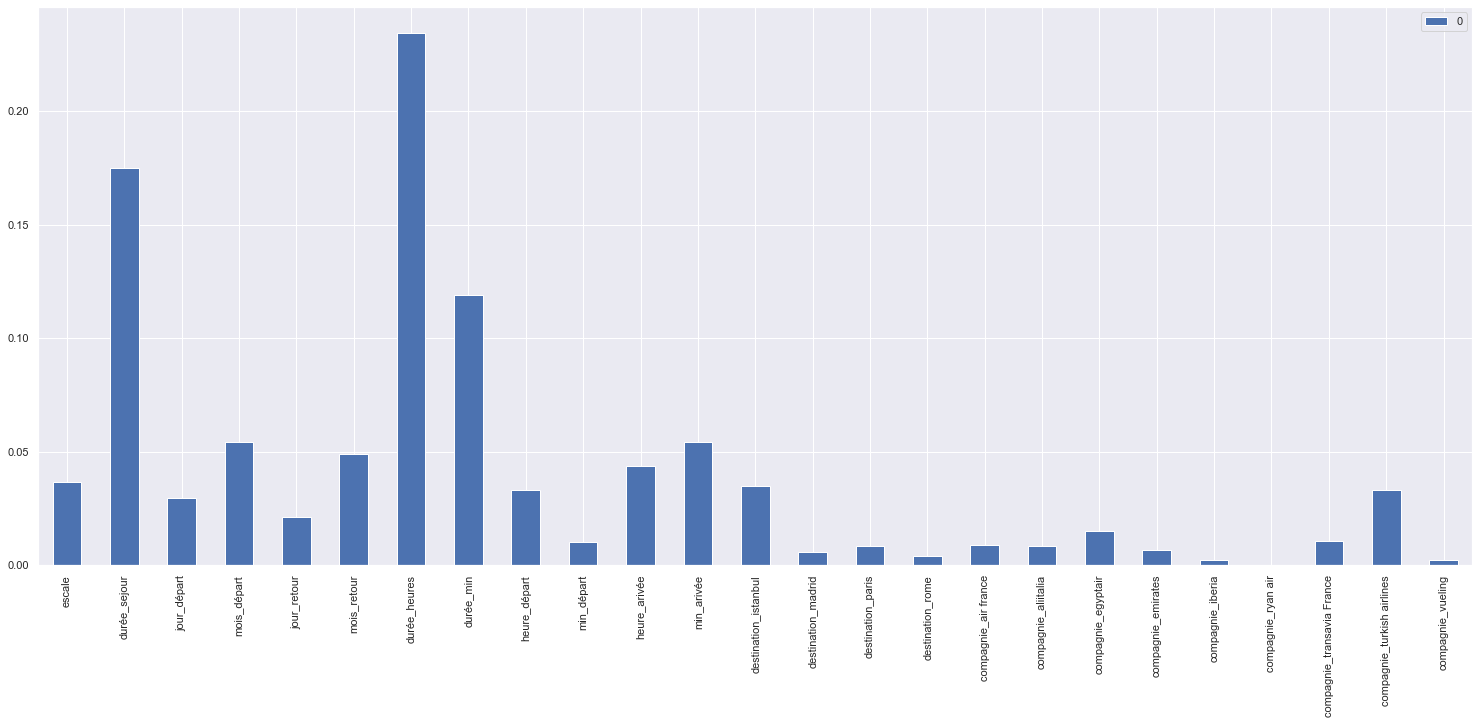

In [320]:
pd.DataFrame(model_2.feature_importances_, index = X_train.columns).plot.bar()

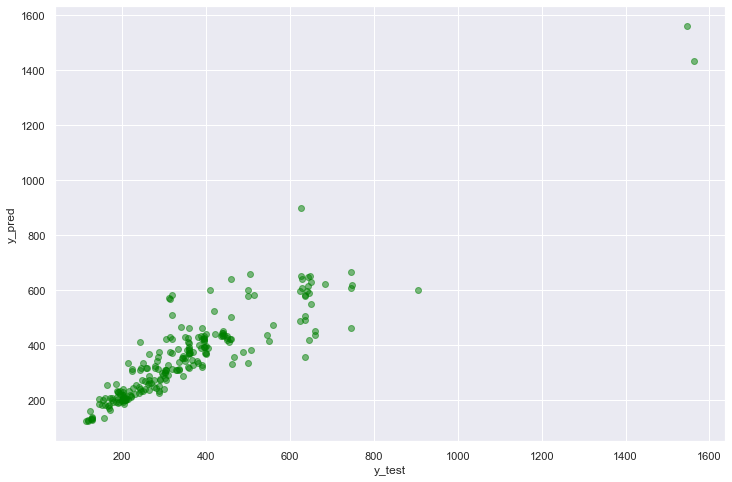

In [364]:
#afficher la destribution des predictions ypred du premier model/au valeurs y_test 
plt.figure(figsize=(12,8))
ypred=model_1.predict(X_test)
plt.scatter(y_test, ypred, alpha = 0.5, color='green')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


## pipelines,StandardScaler, feature selection, SelectKBest, PolynomialFeatures

In [360]:
#évaluer le modél_1 avec une séléction de variables et en créant des variable polynomiaux
 
scores = []
polynomes = [1, 2]
bs=0
for i in range(1,3):
    for j in range(5,26):
        model_11 = make_pipeline(StandardScaler(), PolynomialFeatures(i, include_bias=False), SelectKBest(f_regression, k=j), ExtraTreesRegressor(random_state=0))
        model_11.fit(X_train, y_train)
        s = model_11.score(X_test, y_test)
        if (s > bs):
            model_Extrab = model_11 #saving the best model
            q = i
            e = j 
            bs = s

print('\n\n')
print(f' The best result is for k = {e} and degree = {q} with score of {bs}')
print('\n\n')






 The best result is for k = 24 and degree = 1 with score of 0.8407043514598129





In [363]:
model_Extrab.score(X_test, y_test)

0.8407043514598129

In [361]:
#évaluer le modél_1 avec une séléction de variables et en créant des variable polynomiaux

scores = []
polynomes = [1, 2]
bs=0
for i in range(1,3):
    for j in range(5,26):
        model_11 = make_pipeline(StandardScaler(), PolynomialFeatures(i, include_bias=False), SelectKBest(f_regression, k=j), RandomForestRegressor(random_state=0))
        model_11.fit(X_train, y_train)
        s = model_11.score(X_test, y_test)
        if (s > bs):
            model_randomb = model_11 #saving the best model
            q = i 
            e = j 
            bs = s
print('\n\n')
print(f'The best result is for k = {e} and degree = {q} with score of {bs}')
print('\n\n')






The best result is for k = 24 and degree = 1 with score of 0.840567354631429





In [390]:
model_randomb.score(X_test, y_test)

0.840567354631429

## voting et bagging :

## voting

In [359]:
model_11 = make_pipeline(SelectKBest(f_regression, k=24),RandomForestRegressor(random_state=0))
model_22 = make_pipeline(SelectKBest(f_regression, k=24), ExtraTreesRegressor(random_state=0))
model_3 = GradientBoostingRegressor(random_state=0)
model_4 = VotingRegressor([('linr',model_11),('etr', model_22), ('gbr',model_3)])

for model in (model_11, model_22, model_3, model_4):
    model.fit(X_train, y_train)
    print(model.__class__.__name__ , model.score(X_test, y_test))

Pipeline 0.8392870631808425
Pipeline 0.8407043514598129
GradientBoostingRegressor 0.790960390806488
VotingRegressor 0.8515754573999733


## bagging

In [335]:
model_7 = BaggingRegressor(base_estimator=model_1, n_estimators=100)
model_7.fit(X_train, y_train)
model_7.score(X_test, y_test)

0.7906192000665274

# learning curves : 

In [186]:
from sklearn.model_selection import learning_curve
import numpy as np

RandomForestRegressor


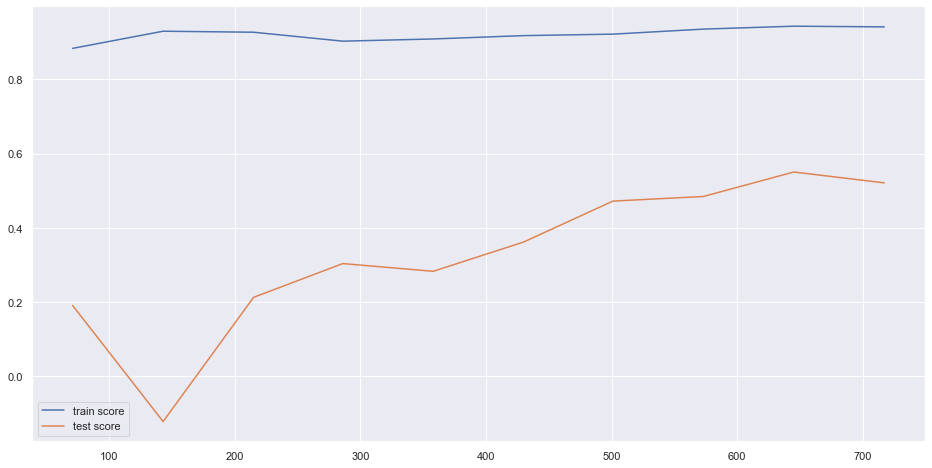

In [404]:
N, train_score, test_score = learning_curve(model_1, X_train, y_train, train_sizes=np.linspace(0.1, 1,10), cv=4)
plt.figure(figsize=(16,8))
print(model_1.__class__.__name__)
plt.plot(N, train_score.mean(axis=1), label = 'train score')
plt.plot(N, test_score.mean(axis=1), label = 'test score')
plt.legend()

ExtraTreesRegressor


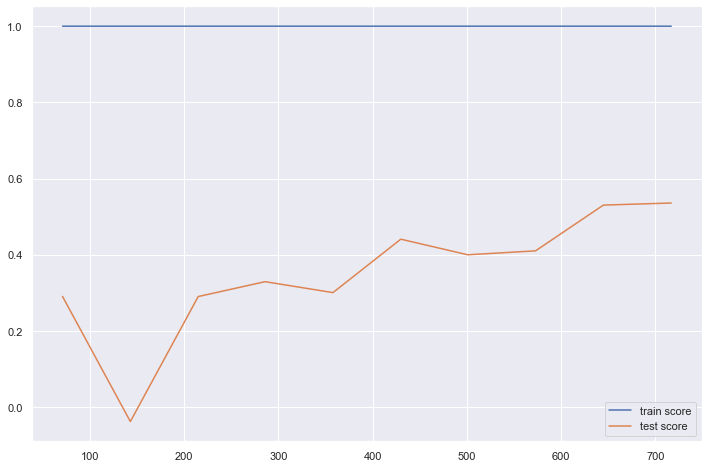

In [403]:
N, train_score, test_score = learning_curve(model_2, X_train, y_train, train_sizes=np.linspace(0.1, 1,10), cv=4)
plt.figure(figsize=(12,8))
print(model_2.__class__.__name__)
plt.plot(N, train_score.mean(axis=1), label = 'train score')
plt.plot(N, test_score.mean(axis=1), label = 'test score')
plt.legend()

## hyper parameter tuning en utilisant randomizedsearchcv

In [348]:
from sklearn.model_selection import RandomizedSearchCV

In [350]:
# Nombre d'arbre dans notre foret
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# nombre de features a considérées a chaque split
max_features = ['auto', 'sqrt']
# nombre max du profondeur dans notre foret
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
#nombre min échantillons pour séparer un noued
min_samples_split = [2, 5, 10, 15, 100]
#Nombre minimum d'échantillons requis à chaque nœud feuille
min_samples_leaf = [1, 2, 5, 10]

In [376]:
params = {'randomforestregressor__n_estimators': n_estimators,
               'randomforestregressor__max_features': max_features,
               'randomforestregressor__max_depth': max_depth,
               'randomforestregressor__min_samples_split': min_samples_split,
               'randomforestregressor__min_samples_leaf': min_samples_leaf}

In [378]:
randomgrid = RandomizedSearchCV(estimator = model_randomb,
                               param_distributions = params,
                               scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5,
                               verbose=2, random_state=42
                               , n_jobs = 1)

In [379]:
randomgrid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] randomforestregressor__n_estimators=900, randomforestregressor__min_samples_split=5, randomforestregressor__min_samples_leaf=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  randomforestregressor__n_estimators=900, randomforestregressor__min_samples_split=5, randomforestregressor__min_samples_leaf=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=10, total=   5.3s
[CV] randomforestregressor__n_estimators=900, randomforestregressor__min_samples_split=5, randomforestregressor__min_samples_leaf=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


[CV]  randomforestregressor__n_estimators=900, randomforestregressor__min_samples_split=5, randomforestregressor__min_samples_leaf=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=10, total=   4.3s
[CV] randomforestregressor__n_estimators=900, randomforestregressor__min_samples_split=5, randomforestregressor__min_samples_leaf=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=10 
[CV]  randomforestregressor__n_estimators=900, randomforestregressor__min_samples_split=5, randomforestregressor__min_samples_leaf=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=10, total=   6.4s
[CV] randomforestregressor__n_estimators=900, randomforestregressor__min_samples_split=5, randomforestregressor__min_samples_leaf=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=10 
[CV]  randomforestregressor__n_estimators=900, randomforestregressor__min_samples_split=5, randomforestregressor__min_samp

[CV]  randomforestregressor__n_estimators=700, randomforestregressor__min_samples_split=5, randomforestregressor__min_samples_leaf=10, randomforestregressor__max_features=auto, randomforestregressor__max_depth=20, total=   4.7s
[CV] randomforestregressor__n_estimators=700, randomforestregressor__min_samples_split=5, randomforestregressor__min_samples_leaf=10, randomforestregressor__max_features=auto, randomforestregressor__max_depth=20 
[CV]  randomforestregressor__n_estimators=700, randomforestregressor__min_samples_split=5, randomforestregressor__min_samples_leaf=10, randomforestregressor__max_features=auto, randomforestregressor__max_depth=20, total=   4.5s
[CV] randomforestregressor__n_estimators=700, randomforestregressor__min_samples_split=5, randomforestregressor__min_samples_leaf=10, randomforestregressor__max_features=auto, randomforestregressor__max_depth=20 
[CV]  randomforestregressor__n_estimators=700, randomforestregressor__min_samples_split=5, randomforestregressor__min_

[CV]  randomforestregressor__n_estimators=300, randomforestregressor__min_samples_split=15, randomforestregressor__min_samples_leaf=1, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=15, total=   1.4s
[CV] randomforestregressor__n_estimators=700, randomforestregressor__min_samples_split=10, randomforestregressor__min_samples_leaf=2, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5 
[CV]  randomforestregressor__n_estimators=700, randomforestregressor__min_samples_split=10, randomforestregressor__min_samples_leaf=2, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, total=   3.1s
[CV] randomforestregressor__n_estimators=700, randomforestregressor__min_samples_split=10, randomforestregressor__min_samples_leaf=2, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5 
[CV]  randomforestregressor__n_estimators=700, randomforestregressor__min_samples_split=10, randomforestregressor__min_sa

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.8min finished


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('polynomialfeatures',
                                              PolynomialFeatures(degree=1,
                                                                 include_bias=False)),
                                             ('selectkbest',
                                              SelectKBest(k=24,
                                                          score_func=<function f_regression at 0x04743ED0>)),
                                             ('randomforestregressor',
                                              RandomForestRegressor(random_state=0))]),
                   n_jobs=1,
                   param_distributions={'randomforestregr...r__max_depth': [5,
                                                                             10,
                                 

In [380]:
randomgrid.best_params_

{'randomforestregressor__n_estimators': 400,
 'randomforestregressor__min_samples_split': 5,
 'randomforestregressor__min_samples_leaf': 5,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__max_depth': 15}

In [382]:
prediction = randomgrid.predict(X_test)

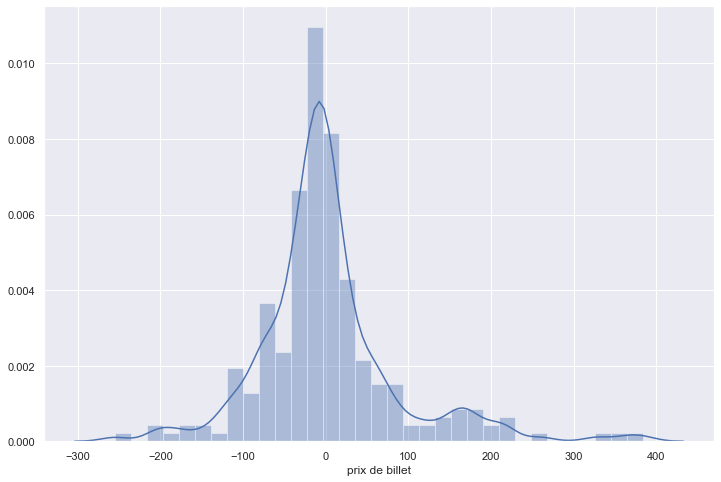

In [386]:
#distribution des predictions pour le model du grid
plt.figure(figsize = (12,8))
sns.distplot(y_test-prediction)
plt.show()

In [388]:
from sklearn import metrics 

In [389]:
metrics.r2_score(y_test, prediction )

0.7936125214489175

In [391]:
y_predict = model_randomb.predict(X_test)

In [395]:
#la pipeline du random forest regressor nous donne un meilleur résultat
metrics.r2_score(y_test, y_predict )

0.840567354631429

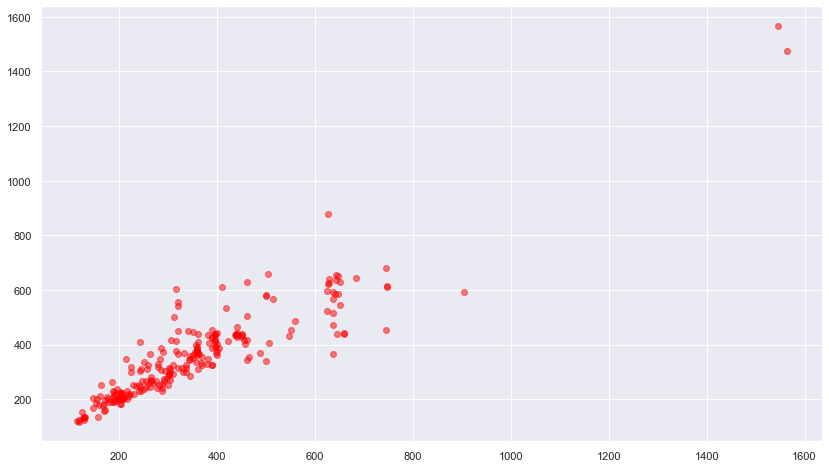

In [393]:
plt.figure(figsize=(14,8))
plt.scatter(y_test, y_predict, alpha=0.5, color='red' )

In [400]:
#sauvegarder le model final
import pickle
with open('model_final', 'wb') as f:
    pickle.dump(model_randomb, f)